In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
df = pd.read_csv("wine.csv")  # replace with your dataset
print("First few rows:\n", df.head())

First few rows:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

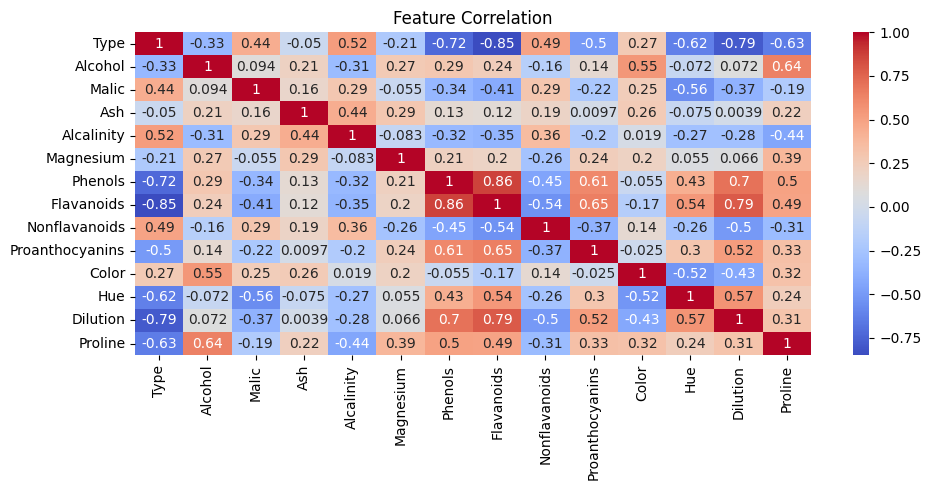

In [5]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

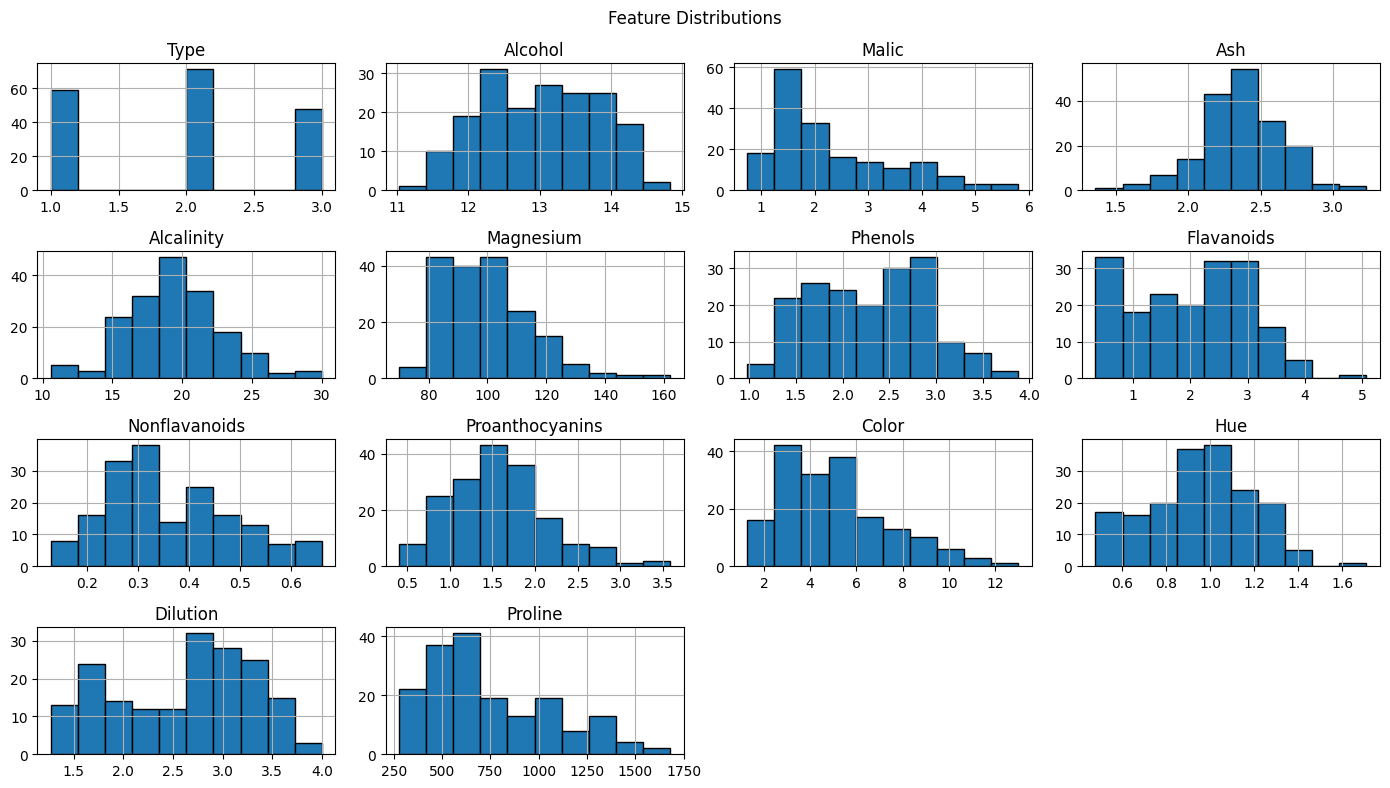

In [7]:
df.hist(bins=10, figsize=(14, 8), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

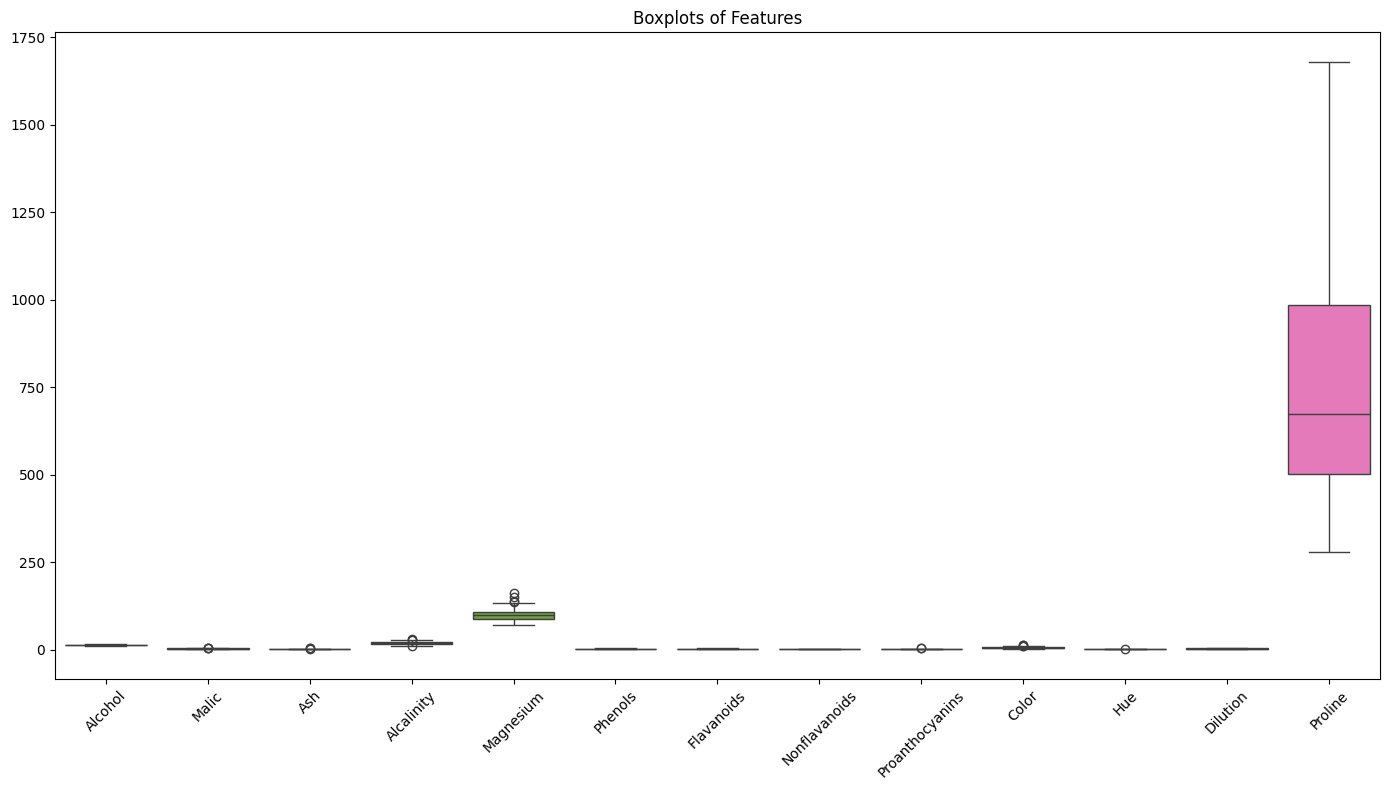

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.drop("Type", axis=1))  
plt.xticks(rotation=45)
plt.title("Boxplots of Features")
plt.tight_layout()
plt.show()

In [10]:
#PCA
X = df.drop("Type", axis=1)  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


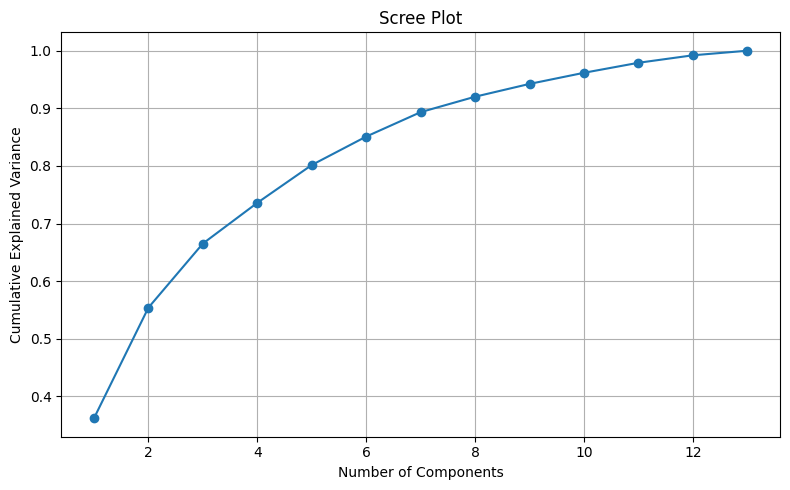

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
#top values
pca_n = PCA(n_components=2)
X_pca_n = pca_n.fit_transform(X_scaled)

In [14]:
#kmeans
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

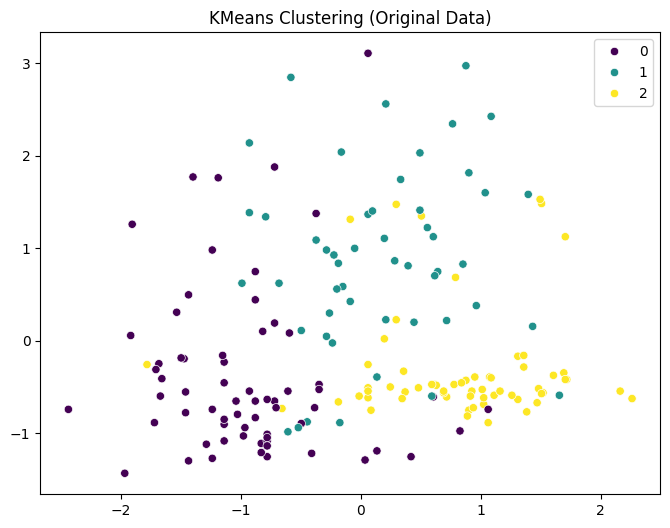

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_orig, palette='viridis')
plt.title("KMeans Clustering (Original Data)")
plt.show()

In [16]:
sil_score_orig = silhouette_score(X_scaled, labels_orig)
db_score_orig = davies_bouldin_score(X_scaled, labels_orig)
print("Original Data - Silhouette Score:", sil_score_orig)
print("Original Data - Davies–Bouldin Index:", db_score_orig)

Original Data - Silhouette Score: 0.2848589191898987
Original Data - Davies–Bouldin Index: 1.3891879777181648


In [17]:
#clustering
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_n)


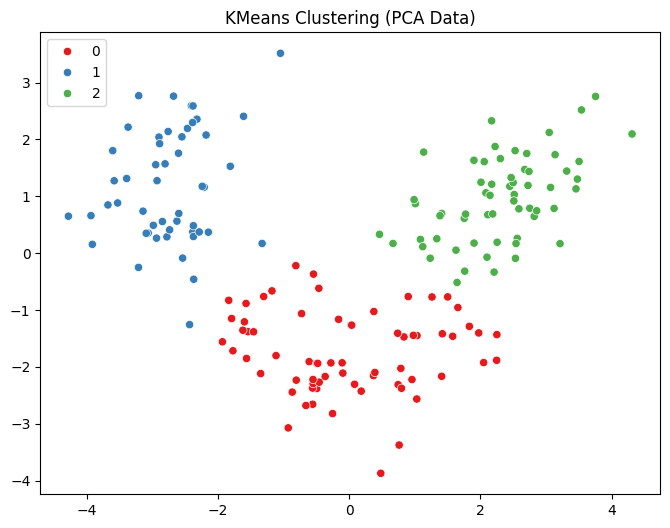

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_n[:, 0], y=X_pca_n[:, 1], hue=labels_pca, palette='Set1')
plt.title("KMeans Clustering (PCA Data)")
plt.show()

In [19]:
sil_score_pca = silhouette_score(X_pca_n, labels_pca)
db_score_pca = davies_bouldin_score(X_pca_n, labels_pca)
print("PCA Data - Silhouette Score:", sil_score_pca)
print("PCA Data - Davies–Bouldin Index:", db_score_pca)

PCA Data - Silhouette Score: 0.5601697480957201
PCA Data - Davies–Bouldin Index: 0.5977226208167411


In [20]:
#comparison
print(f"Original Silhouette: {sil_score_orig:.3f}, PCA Silhouette: {sil_score_pca:.3f}")
print(f"Original DB-Index: {db_score_orig:.3f}, PCA DB-Index: {db_score_pca:.3f}")

Original Silhouette: 0.285, PCA Silhouette: 0.560
Original DB-Index: 1.389, PCA DB-Index: 0.598


In [22]:
if sil_score_pca > sil_score_orig:
    print("PCA improved the clustering structure.")
else:
    print("PCA did not significantly improve clustering.")
print("Using PCA can reduce noise and make clustering faster by reducing dimensions.")

PCA improved the clustering structure.
Using PCA can reduce noise and make clustering faster by reducing dimensions.
